#  King County House Price Prediction Project

**Main Goal** 
To analyze one year of housing market data (May 2014 – May 2015) in King County, including Seattle, with the aim of:

-   Identifying the most important features influencing house prices.

- Building and evaluating predictive models for house sale prices.

- Gaining insights into premium properties valued at $650,000 and above.

## General Data Exploration & Cleaning

Starting first with Exploration & Cleaning of the data. This is done in order to get a birdseye view of what the data consists of in order to determine what the features are with the Price being the target. Main questions this section aims to answer : 

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the House Price?
* Which column contains the feature we will predict? 
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import plotly.graph_objects as go
from tabulate import tabulate
from prettytable import PrettyTable
import plotly.graph_objects as go
import re


In [1255]:
country_houses=pd.read_csv(r"/Users/turfdiddy/Desktop/Bootcamp_ds:ml/Week_5/Project_Ironhack_Kaggle/king_ country_ houses_aa.csv")

### <span style="color:#FFD600"> Exploring the data

In [1256]:
country_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1257]:
country_houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [1258]:
country_houses.shape

(21613, 21)

### <span style="color:#FFD600"> Data Cleaning

In [1259]:
country_houses.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [1260]:
country_houses["id"].nunique()

21436

In [1261]:
country_houses["date"].nunique()

372

In [1262]:
country_houses["date"] = pd.to_datetime(country_houses["date"], errors="coerce")

In [1263]:
country_houses["year"] = country_houses["date"].dt.year
country_houses["month"] = country_houses["date"].dt.month
country_houses["dayofweek"] = country_houses["date"].dt.dayofweek
#country_houses["days_since_start"] = (country_houses["date"] - country_houses["date"].min()).dt.days

# drop the original datetime column before training
country_houses = country_houses.drop(columns=["date"])

In [1264]:
country_houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,dayofweek
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,2


In [ ]:
country_houses["month"].unique()

In [ ]:
country_houses["year"].unique()

#### <span style="color:pink">Visual analysis of date column after extraction

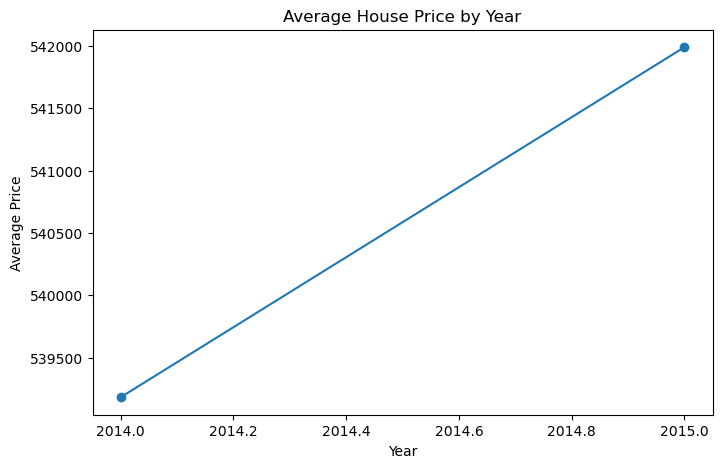

In [1268]:
avg_price_by_year = country_houses.groupby("year")["price"].mean()

plt.figure(figsize=(8,5))
avg_price_by_year.plot(marker="o")
plt.title("Average House Price by Year")
plt.ylabel("Average Price")
plt.xlabel("Year")
plt.show()

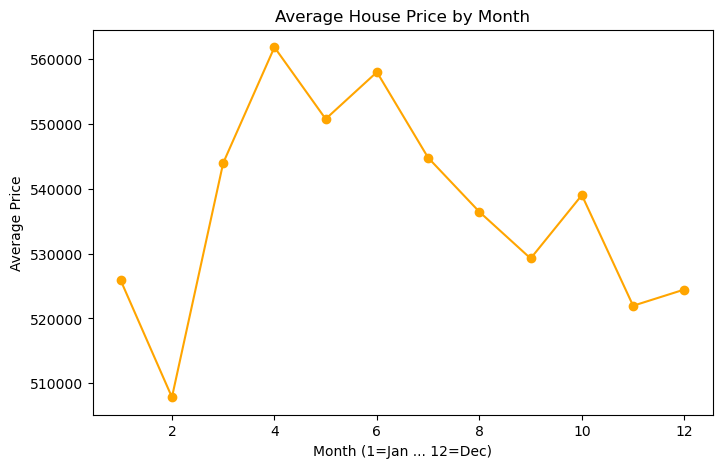

In [1269]:
avg_price_by_month = country_houses.groupby("month")["price"].mean()

plt.figure(figsize=(8,5))
avg_price_by_month.plot(marker="o", color="orange")
plt.title("Average House Price by Month")
plt.ylabel("Average Price")
plt.xlabel("Month (1=Jan ... 12=Dec)")
plt.show()

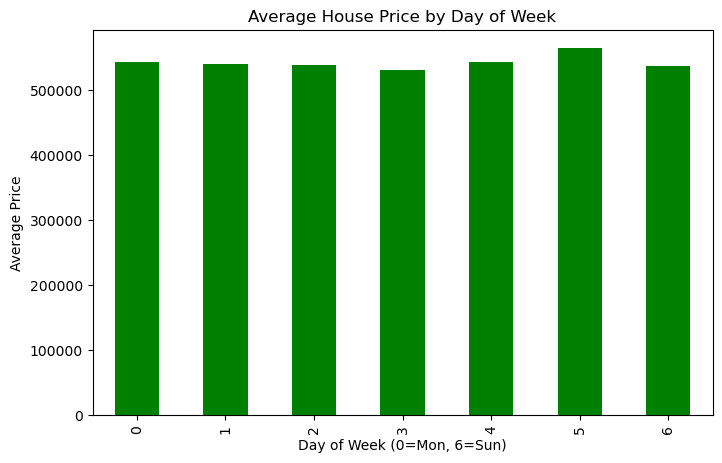

In [1270]:
avg_price_by_day = country_houses.groupby("dayofweek")["price"].mean()

plt.figure(figsize=(8,5))
avg_price_by_day.plot(kind="bar", color="green")
plt.title("Average House Price by Day of Week")
plt.ylabel("Average Price")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.show()

Insights:
-   Price seems to constantly increase within the timeframe set in the dataset

-   Spikes differences the months may indicate seasonal trends making months an indicator/feature of interest

-   The average price within the various weeks has a uniform distribution indicate no direct individual influence of a particular day on price

In [1271]:
country_houses.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int32
month              int32
dayofweek          int32
dtype: object

In [1272]:
country_houses.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dayofweek        0
dtype: int64

In [1273]:
country_houses.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dayofweek        0
dtype: int64

### <span style="color:#FFD600"> Data Preprocessing with EDA

In [1274]:
# Likely important features for the target include bedroooms, bathrooms, sqft_living,sgft_lot,floors,waterfront,view,condition,grade,sft_above,sft_basement,yr_built,yr_renovated,zip code area, sgft_living15,sqft_lot15, lat & longitudes.

# the next logical step here is verify which of these features are most important with the help of correlations and visualizations

In [1275]:
corr=country_houses.drop(columns=["id","year","month","dayofweek"])

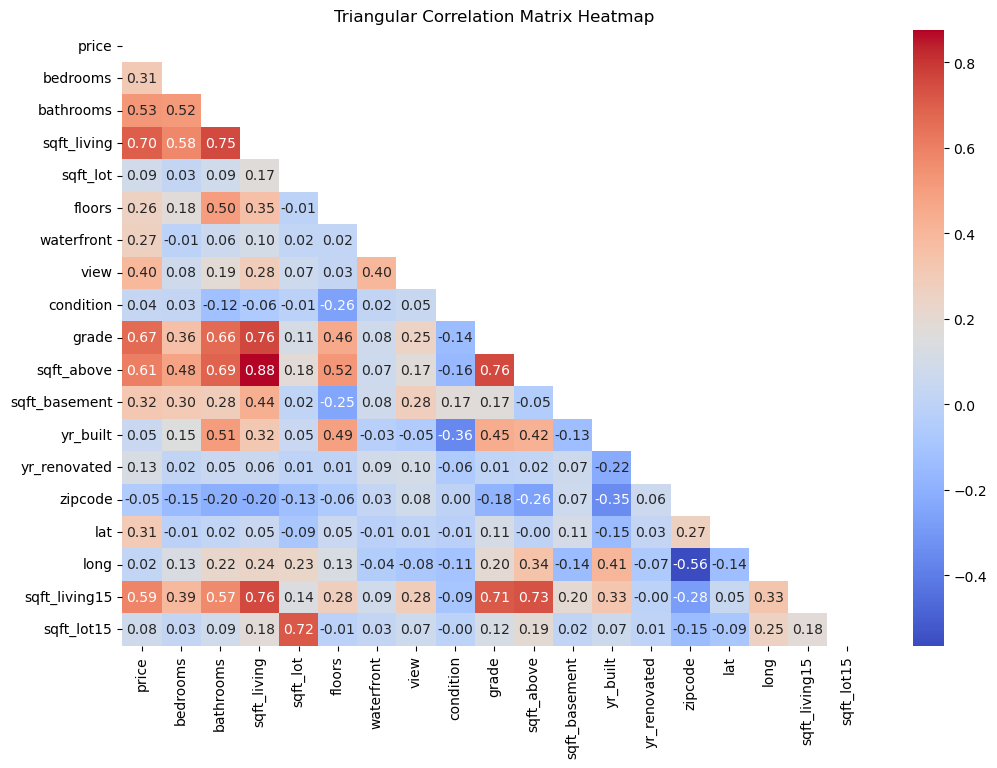

In [1276]:
# Compute correlation matrix
corr_matrix = corr.corr()
# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap (triangular form)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title("Triangular Correlation Matrix Heatmap")
plt.show()

-   All the columns seem to have pretty low correlations with price with the exceptions of sqr_ft living which has the highest of 0.72, which is still below the cut off threshold of 0.9

-   Besides that sqr_ft living seems to have a high correlations with sqr_ft living 15 and sqr_ft above and grade

After getting a baseline of what the dataset looks like in its raw form we move now to the Model generation

## Model Generation

### <span style="color:yellow">X and y Split

In [1277]:
X=country_houses.drop(columns= ["id","price"])

In [1278]:
y=country_houses["price"]

### <span style="color:yellow">Handle categorical values

-   The dataset consists mainly of only numerical values. No need for feature encoding

### <span style="color:yellow">Modeling

In [1279]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, random_state=0 ,test_size= 0.2)

lin_model=LinearRegression()

lin_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### <span style="color:yellow">Prediction generation

In [1280]:
y_pred_test = lin_model.predict(X_test)
y_pred_train= lin_model.predict(X_train)

### <span style="color:yellow">Evaluation using MSE and R2 Score

In [1281]:
# MSE
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)

# RMSE (optional, easier to interpret)
rmse_test = np.sqrt(mse_test)
rmse_train=np.sqrt(mse_train)

# R² Score
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train,y_pred_train)

print("MSE Test:", mse_test)
print("MSE Train", mse_train)
print("RMSE Test:", rmse_test)
print("RMSE Train:", rmse_train)

print("R² Score Test:", r2_test)
print("R² Score Train:", r2_train)


MSE Test: 36120375752.12713
MSE Train 41318129689.78232
RMSE Test: 190053.61283629187
RMSE Train: 203268.61462061064
R² Score Test: 0.6962741418067724
R² Score Train: 0.7021103542003952


In [1282]:
results=[]

In [1283]:
results.append({
            "Model": "Linear Regression raw data",
            "R2 Train": r2_train,
            "R2 Test": r2_test,
            "RMSE (Train)": rmse_train,
            "RMSE (Test)": rmse_test,
            "MSE (Train)": mse_train,
            "MSE (Test)":  mse_test
        })

## Model Improvements by Data Optimisation


### <span style="color:yellow">Feature scaling - Standardization

#### <span style="color:pink">Train Test-Split with scaler optimization

In [1284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### <span style="color:pink">Model training


In [1285]:
lin_model_scaled_data=LinearRegression()

lin_model_scaled_data.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### <span style="color:pink">Predictions

In [1286]:
y_pred_train_scaled = lin_model_scaled_data.predict(X_train_scaled)
y_pred_test_scaled  = lin_model_scaled_data.predict(X_test_scaled)

#### <span style="color:pink">Evaluations

In [1287]:
mse_train_scaled = mean_squared_error(y_train, y_pred_train_scaled)
mse_test_scaled  = mean_squared_error(y_test, y_pred_test_scaled)

rmse_train_scaled = np.sqrt(mse_train)
rmse_test_scaled  = np.sqrt(mse_test)

r2_train_scaled = r2_score(y_train, y_pred_train_scaled)
r2_test_scaled  = r2_score(y_test, y_pred_test_scaled)



print("MSE Train:", mse_train_scaled)
print("MSE Test:", mse_test_scaled)
print("RMSE Train:", rmse_train_scaled)
print("RMSE Test:", rmse_test_scaled)
print("R² Train:", r2_train_scaled)
print("R² Test:", r2_test_scaled)

MSE Train: 41318129689.78231
MSE Test: 36120375752.124725
RMSE Train: 203268.61462061064
RMSE Test: 190053.61283629187
R² Train: 0.7021103542003954
R² Test: 0.6962741418067926


In [1288]:
results.append({
            "Model": "Linear Regression standardized data",
            "R2 Train": r2_train_scaled,
            "R2 Test": r2_test_scaled,
            "RMSE (Train)": rmse_train_scaled,
            "RMSE (Test)": rmse_test_scaled,
            "MSE (Train)": mse_train_scaled,
            "MSE (Test)":  mse_test_scaled
        })

- very minor improvements using Standardization to optimize the model

### <span style="color:yellow">Collinearity

-   Here I removed weak correlating columns to price to observe the impact on the model. These columns are sqft_lot, sgt_lot15,condition,yr_renovated,lat & long. 

In [1289]:
X=country_houses.drop(columns= ["id","price","sqft_lot","sqft_lot15","condition","yr_renovated" ,"lat","long"])

In [1290]:
y=country_houses["price"]

#### <span style="color:pink">Train Test-Split with column optimization

In [1291]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X ,y, random_state=0 ,test_size= 0.2)

lin_model1=LinearRegression()



#### <span style="color:pink">Model training

In [1292]:
lin_model1.fit(X_train1, y_train1)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### <span style="color:pink">Predictions

In [1293]:
y_pred_train1 = lin_model1.predict(X_train1)
y_pred_test1 = lin_model1.predict(X_test1)

#### <span style="color:pink">Evaluations

In [1294]:
mse_train1 = mean_squared_error(y_train1, y_pred_train1)
mse_test1 = mean_squared_error(y_test1, y_pred_test1)

rmse_train1 = np.sqrt(mse_train1)
rmse_test1  = np.sqrt(mse_test1)

r2_train1 = r2_score(y_train1, y_pred_train1)
r2_test1  = r2_score(y_test1, y_pred_test1)



print("MSE Train:", mse_train1)
print("MSE Test:", mse_test1)
print("RMSE Train:", rmse_train1)
print("RMSE Test:", rmse_test1)
print("R² Train:", r2_train1)
print("R² Test:", r2_test1)

MSE Train: 48028706100.211716
MSE Test: 42303392303.9148
RMSE Train: 219154.52562110533
RMSE Test: 205677.88481972195
R² Train: 0.6537293833040205
R² Test: 0.6442829327091193


In [1295]:
results.append({
            "Model": "Linear Regression dropped columns",
            "R2 Train": r2_train1,
            "R2 Test": r2_test1,
            "RMSE (Train)": rmse_train1,
            "RMSE (Test)": rmse_test1,
            "MSE (Train)": mse_train1,
            "MSE (Test)":  mse_test1
        })

### <span style="color:yellow">Feature Engineering - Encoding

-   The dates column has duplicates that seem to have the same variables in all other columns but different prices. In order to address this problem , the attempt here is to encode the column with a cycle attributing the month trends from January to December. So far the model is treating the extracted numerical dates 01 and 12 as months far apart although Jan follows right after December. By encoding this dates feature in a cycle , the model may be trained to observe the other factors that may be affecting this price within the same row and if theres nothing different there , meaning all factors are the same then the model just has more data to learn with

In [1296]:
# Cyclical encoding for month (1–12)

country_houses_cyc=country_houses.copy()



country_houses_cyc["month_sin"] = np.sin(2 * np.pi * country_houses_cyc["month"] / 12)
country_houses_cyc["month_cos"] = np.cos(2 * np.pi *country_houses_cyc["month"] / 12)

#Cyclical encoding for dayofweek (0–6, where 0=Monday, 6=Sunday)
country_houses_cyc["day_sin"] = np.sin(2 * np.pi * country_houses_cyc["dayofweek"] / 7)
country_houses_cyc["day_cos"] = np.cos(2 * np.pi * country_houses_cyc["dayofweek"] / 7)

#Drop raw columns if you want
#country_houses_cyc = country_houses_cyc.drop(columns=["month", "dayofweek"])

In [1298]:
#X=country_houses_cyc.drop(columns= ["id","price"])

In [1299]:
#y=country_houses_cyc["price"]

#### <span style="color:pink">Train Test-Split with feature engineering

In [1300]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X ,y, random_state=0 ,test_size= 0.2)

lin_model2=LinearRegression()


#### <span style="color:pink">Model training

In [1301]:
lin_model2.fit(X_train2, y_train2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### <span style="color:pink">Predictions

In [1302]:
y_pred_train2 = lin_model2.predict(X_train2)
y_pred_test2 = lin_model2.predict(X_test2)

#### <span style="color:pink">Evaluations

In [1303]:
mse_train2 = mean_squared_error(y_train2, y_pred_train2)
mse_test2 = mean_squared_error(y_test2, y_pred_test2)

rmse_train2 = np.sqrt(mse_train2)
rmse_test2 = np.sqrt(mse_test2)

r2_train2 = r2_score(y_train2, y_pred_train2)
r2_test2  = r2_score(y_test2, y_pred_test2)



print("MSE Train:", mse_train2)
print("MSE Test:", mse_test2)
print("RMSE Train:", rmse_train2)
print("RMSE Test:", rmse_test2)
print("R² Train:", r2_train2)
print("R² Test:", r2_test2)

MSE Train: 48028706100.211716
MSE Test: 42303392303.9148
RMSE Train: 219154.52562110533
RMSE Test: 205677.88481972195
R² Train: 0.6537293833040205
R² Test: 0.6442829327091193


In [1304]:
results.append({
            "Model": "Linear Regression feature engineering",
            "R2 Train": r2_train2,
            "R2 Test": r2_test2,
            "RMSE (Train)": rmse_train2,
            "RMSE (Test)": rmse_test2,
            "MSE (Train)": mse_train2,
            "MSE (Test)":  mse_test2
        })

## Model Improvements by Model Comparisons & Hyperparameter Optimizations

### Ensemble algorithms

#### <span style="color:yellow">RandomForestRegressor

##### <span style="color:pink">X and y split

In [1305]:
X=country_houses.drop(columns= ["id","price"])

In [1306]:
y=country_houses["price"]

##### <span style="color:pink">Train ,Test Split

In [1307]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)


##### <span style="color:pink">Model training

In [1308]:
rf_regressor = RandomForestRegressor(n_estimators=150, random_state=42)

rf_regressor.fit(X_train3, y_train3)

,n_estimators,150
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


##### <span style="color:pink">Prediction

In [1309]:
y_pred_test_rf = rf_regressor.predict(X_test3)
y_pred_train_rf= rf_regressor.predict(X_train3)

##### <span style="color:pink">Evaluations

In [1310]:

mse3_test = mean_squared_error(y_test3, y_pred_test_rf)
mse3_train =mean_squared_error(y_train3, y_pred_train_rf)

r2_rf_test = r2_score(y_test3, y_pred_test_rf)
r2_rf_train=r2_score(y_train3,y_pred_train_rf)


rmse_test_rf  = np.sqrt(mse3_test)
rmse_train_rf = np.sqrt(mse3_train)


print(f"Mean Squared Error Train : {mse3_train:.2f}")
print(f"Mean Squared Error Test : {mse3_test:.2f}")

print(f"R-squared Score Train : {r2_rf_train:.4f}")
print(f"R-squared Score Test : {r2_rf_test:.4f}")


print(f"RMSE Train : {rmse_train_rf:.2f}")
print(f"RMSE Test : {rmse_test_rf:.2f}")

Mean Squared Error Train : 2195627862.88
Mean Squared Error Test : 22401056283.68
R-squared Score Train : 0.9832
R-squared Score Test : 0.8518
RMSE Train : 46857.53
RMSE Test : 149669.82


In [1311]:
results.append({
            "Model": "Random Forest regressor",
            "R2 Train": r2_rf_train,
            "R2 Test": r2_rf_test,
            "RMSE (Train)": rmse_train_rf,
            "RMSE (Test)": rmse_test_rf,
            "MSE (Train)": mse3_train,
            "MSE (Test)":  mse3_test
        })

#### <span style="color:yellow">XGBoostRegressor

##### <span style="color:pink">X and y split


In [1312]:
X=country_houses.drop(columns= ["id","price"])

In [1313]:
y=country_houses["price"]

##### <span style="color:pink">Train ,Test Split

In [1314]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)


##### <span style="color:pink">Model training

In [1315]:

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train4, y_train4)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


##### <span style="color:pink">Prediction

In [1316]:
y_pred_test_xgb = xgb_reg.predict(X_test4)
y_pred_train_xgb= xgb_reg.predict(X_train4)

##### <span style="color:pink">Evaluations

In [1317]:

mse4_test = mean_squared_error(y_test4, y_pred_test_xgb)
mse4_train =mean_squared_error(y_train4, y_pred_train_xgb)

r2_xgb_test = r2_score(y_test4, y_pred_test_xgb)
r2_xgb_train=r2_score(y_train4,y_pred_train_xgb)


rmse_test_xgb  = np.sqrt(mse4_test)
rmse_train_xgb = np.sqrt(mse4_train)


print(f"Mean Squared Error Train : {mse4_train:.2f}")
print(f"Mean Squared Error Test : {mse4_test:.2f}")

print(f"R-squared Score Train : {r2_xgb_train:.4f}")
print(f"R-squared Score Test : {r2_xgb_test:.4f}")


print(f"RMSE Train : {rmse_train_xgb:.2f}")
print(f"RMSE Test : {rmse_test_xgb:.2f}")

Mean Squared Error Train : 2925218638.51
Mean Squared Error Test : 21711668500.04
R-squared Score Train : 0.9776
R-squared Score Test : 0.8564
RMSE Train : 54085.29
RMSE Test : 147348.80


In [1318]:
results.append({
            "Model": "XGBoost Regressor",
            "R2 Train": r2_xgb_train,
            "R2 Test": r2_xgb_test,
            "RMSE (Train)": rmse_train_xgb,
            "RMSE (Test)": rmse_test_xgb,
            "MSE (Train)": mse4_train,
            "MSE (Test)":  mse4_test
        })

#### <span style="color:yellow">Improvements using RandomizedSearch

##### <span style="color:pink">RandomizedSearch

In [1319]:
# Define the model
xgb_reg_rf = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

# Define parameter distribution for sampling
param_dist = {
    "n_estimators":      [500, 800, 1200],     # pair with early_stopping
    "learning_rate":     [0.01, 0.03, 0.05, 0.1],
    "max_depth":         [4, 6, 8, 10],        # ints only
    "min_child_weight":  [1, 3, 5, 7],
    "gamma":             [0, 0.05, 0.1, 0.2],  # small floats usually best
    "subsample":         [0.7, 0.85, 1.0],
    "colsample_bytree":  [0.6, 0.8, 1.0],
    "reg_alpha":         [0.0, 0.1, 0.5, 1.0], # L1
    "reg_lambda":        [1.0, 3.0, 5.0],      # L2
}
# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_reg_rf,
    param_distributions=param_dist,
    n_iter=20,                 # number of random combinations to try
    cv=3,                      # 3-fold cross-validation (faster than 5)
    scoring='neg_mean_squared_error',
    n_jobs=-1,                 # use all CPU cores
    verbose=2,
    random_state=42
)

# Fit randomized search
random_search.fit(X_train4, y_train4)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Best model from RandomizedSearchCV
best_xgb = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=3.0, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=500, reg_alpha=1.0, reg_lambda=3.0, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learnin

##### <span style="color:#87CEFA">XGBoost improved

In [1320]:
best_params = {
    "subsample": 0.7,
    "reg_lambda": 3.0,
    "reg_alpha": 0.0,
    "n_estimators": 800,
    "min_child_weight": 1,
    "max_depth": 5,
    "learning_rate": 0.03,
    "gamma": 0.1,
    "colsample_bytree": 0.6,
    "objective": "reg:squarederror",
    "tree_method": "hist",
    "random_state": 42,
    "n_jobs": -1,
}

xgb_reg2 = xgb.XGBRegressor(**best_params)
xgb_reg2.fit(X_train4, y_train4)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


<span style="color:#87CEFA">**Predictions**

In [1321]:
# Evaluate on test set
#y_pred5 = best_xgb.predict(X_test4)
#mse_rscv = mean_squared_error(y_test4, y_pred5)
#print("Test MSE:", mse_rscv)

In [1322]:
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train4,y_train4)
y_pred_test_xgb_improved=best_xgb.predict(X_test4)
y_pred_train_xgb_improved=best_xgb.predict(X_train4)
                                        

<span style="color:#87CEFA">**Evaluations**

In [1323]:

mse5_test = mean_squared_error(y_test4, y_pred_test_xgb_improved)
mse5_train =mean_squared_error(y_train4, y_pred_train_xgb_improved)

r2_xgb_test_improved = r2_score(y_test4, y_pred_test_xgb_improved)
r2_xgb_train_improved=r2_score(y_train4,y_pred_train_xgb_improved)


rmse_test_xgb_improved  = np.sqrt(mse5_test)
rmse_train_xgb_improved = np.sqrt(mse5_train)


print(f"Mean Squared Error Train : {mse5_train:.2f}")
print(f"Mean Squared Error Test : {mse5_test:.2f}")

print(f"R-squared Score Train : {r2_xgb_train_improved:.4f}")
print(f"R-squared Score Test : {r2_xgb_test_improved:.4f}")


print(f"RMSE Train : {rmse_train_xgb_improved:.2f}")
print(f"RMSE Test : {rmse_test_xgb_improved:.2f}")

Mean Squared Error Train : 5421363857.58
Mean Squared Error Test : 18664289052.69
R-squared Score Train : 0.9585
R-squared Score Test : 0.8765
RMSE Train : 73629.91
RMSE Test : 136617.31


Testing 70 ,30 split

In [1324]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(X, y, test_size=0.3, random_state=42)


In [1325]:
best_params = {
    "subsample": 0.7,
    "reg_lambda": 3.0,
    "reg_alpha": 0.0,
    "n_estimators": 800,
    "min_child_weight": 1,
    "max_depth": 5,
    "learning_rate": 0.03,
    "gamma": 0.1,
    "colsample_bytree": 0.6,
    "objective": "reg:squarederror",
    "tree_method": "hist",
    "random_state": 42,
    "n_jobs": -1,
}

xgb_reg2 = xgb.XGBRegressor(**best_params)
xgb_reg2.fit(X_train9, y_train9)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [1326]:
best_xgb1 = xgb.XGBRegressor(**best_params)
best_xgb1.fit(X_train9,y_train9)
y_pred_test_xgb_improved_1=best_xgb.predict(X_test9)
y_pred_train_xgb_improved_1=best_xgb.predict(X_train9)

In [1327]:

mse5_test1 = mean_squared_error(y_test9, y_pred_test_xgb_improved_1)
mse5_train1 =mean_squared_error(y_train9, y_pred_train_xgb_improved_1)

r2_xgb_test_improved_1 = r2_score(y_test9, y_pred_test_xgb_improved_1)
r2_xgb_train_improved_1=r2_score(y_train9,y_pred_train_xgb_improved_1)


rmse_test_xgb_improved_1  = np.sqrt(mse5_test1)
rmse_train_xgb_improved_1 = np.sqrt(mse5_train1)


print(f"Mean Squared Error Train : {mse5_train1:.2f}")
print(f"Mean Squared Error Test : {mse5_test1:.2f}")

print(f"R-squared Score Train : {r2_xgb_train_improved_1:.4f}")
print(f"R-squared Score Test : {r2_xgb_test_improved_1:.4f}")


print(f"RMSE Train : {rmse_train_xgb_improved_1:.2f}")
print(f"RMSE Test : {rmse_test_xgb_improved_1:.2f}")

Mean Squared Error Train : 5437585989.65
Mean Squared Error Test : 14212810646.96
R-squared Score Train : 0.9584
R-squared Score Test : 0.9016
RMSE Train : 73739.99
RMSE Test : 119217.49


In [1328]:
results.append({
            "Model": "XGBoost Regressor Optimized",
            "R2 Train": r2_xgb_train_improved_1,
            "R2 Test": r2_xgb_test_improved_1,
            "RMSE (Train)": rmse_train_xgb_improved_1,
            "RMSE (Test)": rmse_test_xgb_improved_1,
            "MSE (Train)": mse5_train1,
            "MSE (Test)":  mse5_test1
        })

##### <span style="color:#87CEFA">RandomForest improved

In [1329]:
# Define the model
rf = RandomForestRegressor(random_state=42)

# Define parameter distribution for sampling
param_dist = {
    'n_estimators': [100, 200, 300, 500],   # number of trees
    'max_depth': [None, 10, 20, 30],        # tree depth
    'min_samples_split': [2, 5, 10],        # min samples to split
    'min_samples_leaf': [1, 2, 4],          # min samples per leaf
    'max_features': ['sqrt', 'log2', None]  # number of features per split
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                 # number of random combinations to try
    cv=3,                      # 3-fold cross-validation (faster than 5)
    scoring='neg_mean_squared_error',
    n_jobs=-1,                 # use all CPU cores
    verbose=2,
    random_state=42
)

# Fit randomized search
random_search.fit(X_train3, y_train3)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Best model
best_rf = random_search.best_estimator_

# Evaluate on test set
#y_pred_rf_improved = best_rf.predict(X_test3)
#mse_rf_improved = mean_squared_error(y_test3, y_pred_rf_improved)
#print("Test MSE:", mse_rf_improved)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.5s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  27.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  28.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  28.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   7.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   9.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators

<span style="color:#87CEFA">**Model training**

In [1330]:
rf_regressor_improved = RandomForestRegressor(
    n_estimators=550,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_regressor_improved.fit(X_train3, y_train3)

,n_estimators,550
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<span style="color:#87CEFA">**Predictions**

In [1331]:
y_pred_test_rf_improved = rf_regressor_improved.predict(X_test3)
y_pred_train_rf_improved = rf_regressor_improved.predict(X_train3)

<span style="color:#87CEFA">**Evaluations**

In [1332]:

mse6_test = mean_squared_error(y_test3, y_pred_test_rf_improved)
mse6_train =mean_squared_error(y_train3,y_pred_train_rf_improved)

r2_rf_test_improved = r2_score(y_test3, y_pred_test_rf_improved)
r2_rf_train_improved =r2_score(y_train3,y_pred_train_rf_improved)


rmse_test_rf_improved  = np.sqrt(mse6_test)
rmse_train_rf_improved = np.sqrt(mse6_train)


print(f"Mean Squared Error Train : {mse6_train:.2f}")
print(f"Mean Squared Error Test : {mse6_test:.2f}")

print(f"R-squared Score Train : {r2_rf_train_improved:.4f}")
print(f"R-squared Score Test : {r2_rf_test_improved:.4f}")


print(f"RMSE Train : {rmse_train_rf_improved:.2f}")
print(f"RMSE Test : {rmse_test_rf_improved:.2f}")

Mean Squared Error Train : 8706789189.96
Mean Squared Error Test : 23354884548.97
R-squared Score Train : 0.9334
R-squared Score Test : 0.8455
RMSE Train : 93310.18
RMSE Test : 152823.05


In [1333]:
results.append({
            "Model": "RandomForest Regressor Optimized",
            "R2 Train": r2_rf_train_improved,
            "R2 Test": r2_rf_test_improved,
            "RMSE (Train)": rmse_train_rf_improved,
            "RMSE (Test)": rmse_test_rf_improved,
            "MSE (Train)": mse6_train,
            "MSE (Test)":  mse6_test
        })


#### <span style="color:yellow">GradientBoostingRegressor

In [1334]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.2, random_state=42)


In [1335]:
gb = GradientBoostingRegressor(random_state=42)

param_dist = {
    "n_estimators":      randint(200, 1200),     # number of trees
    "learning_rate":     uniform(0.01, 0.19),    # ~[0.01, 0.20]
    "max_depth":         randint(2, 8),          # tree depth of base learners
    "min_samples_split": randint(2, 20),
    "min_samples_leaf":  randint(1, 10),
    "subsample":         uniform(0.6, 0.4),      # ~[0.6, 1.0]
    "max_features":      ["sqrt", "log2", None]  # features per split
}

rs_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=40,                 # drop to 20 if you need it faster; raise for better search
    scoring="neg_mean_squared_error",
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2,
    refit=True
)

rs_gb.fit(X_train5, y_train5)

print("Best params:", rs_gb.best_params_)
print("Best CV (neg MSE):", rs_gb.best_score_)

best_gb = rs_gb.best_estimator_

# Evaluate
y_pred_train_gbr = best_gb.predict(X_train5)
y_pred_test_gbr  = best_gb.predict(X_test5)

mse7_train = mean_squared_error(y_train5, y_pred_train_gbr)
mse7_test  = mean_squared_error(y_test5,  y_pred_test_gbr)

rmse_train = np.sqrt(mse7_train)
rmse_test  = np.sqrt(mse7_test)
r2_train = r2_score(y_train5, y_pred_train_gbr)
r2_test  = r2_score(y_test5,  y_pred_test_gbr)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END learning_rate=0.05034443102887247, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=513, subsample=0.8099025726528951; total time=  16.7s
[CV] END learning_rate=0.05034443102887247, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=513, subsample=0.8099025726528951; total time=  18.9s
[CV] END learning_rate=0.05034443102887247, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=513, subsample=0.8099025726528951; total time=  19.6s
[CV] END learning_rate=0.08116262258099886, max_depth=6, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=321, subsample=0.662397808134481; total time=  44.3s
[CV] END learning_rate=0.08116262258099886, max_depth=6, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=321, subsample=0.662397808134481; total time=  44.4s
[CV] END learning

In [1336]:

mse8_test = mean_squared_error(y_test5, y_pred_test_gbr)
mse8_train =mean_squared_error(y_train5, y_pred_train_gbr)

r2_gbr_test = r2_score(y_test5, y_pred_test_gbr)
r2_gbr_train=r2_score(y_train4,y_pred_train_gbr)


rmse_test_gbr  = np.sqrt(mse8_test)
rmse_train_gbr = np.sqrt(mse8_train)


print(f"Mean Squared Error Train : {mse8_train:.4f}")
print(f"Mean Squared Error Test : {mse8_test:.4f}")

print(f"R-squared Score Train : {r2_gbr_train:.4f}")
print(f"R-squared Score Test : {r2_gbr_test:.4f}")


print(f"RMSE Train : {rmse_train_gbr:.4f}")
print(f"RMSE Test : {rmse_test_gbr:.4f}")

Mean Squared Error Train : 4658204367.0376
Mean Squared Error Test : 17592003138.0823
R-squared Score Train : 0.9643
R-squared Score Test : 0.8836
RMSE Train : 68251.0393
RMSE Test : 132634.8489


In [1337]:
results.append({
            "Model": "GradientBoosting Regressor",
            "R2 Train": r2_gbr_train,
            "R2 Test": r2_gbr_test,
            "RMSE (Train)": rmse_train_gbr,
            "RMSE (Test)": rmse_test_gbr,
            "MSE (Train)": mse8_train,
            "MSE (Test)":  mse8_test
        })

In [1338]:
table=pd.DataFrame(results)

In [1339]:
table

,Model,R2 Train,R2 Test,RMSE (Train),RMSE (Test),MSE (Train),MSE (Test)
0,Linear Regression raw data,0.702110,0.696274,203268.614621,190053.612836,4.131813e+10,3.612038e+10
1,Linear Regression standardized data,0.702110,0.696274,203268.614621,190053.612836,4.131813e+10,3.612038e+10
2,Linear Regression dropped columns,0.653729,0.644283,219154.525621,205677.884820,4.802871e+10,4.230339e+10
3,Linear Regression feature engineering,0.653729,0.644283,219154.525621,205677.884820,4.802871e+10,4.230339e+10
4,Random Forest regressor,0.983194,0.851822,46857.527281,149669.824225,2.195628e+09,2.240106e+10
5,XGBoost Regressor,0.977610,0.856382,54085.290408,147348.798774,2.925219e+09,2.171167e+10
6,XGBoost Regressor Optimized,0.958379,0.901551,73739.989081,119217.493041,5.437586e+09,1.421281e+10
7,RandomForest Regressor Optimized,0.933357,0.845513,93310.177312,152823.049796,8.706789e+09,2.335488e+10
8,GradientBoosting Regressor,0.964346,0.883633,68251.039311,132634.848882,4.658204e+09,1.759200e+10


<span style="color:#87CEFA">**Evaluations**

In [1340]:
feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': xgb_reg2.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)

          Feature  Importance
8           grade    0.307339
2     sqft_living    0.159512
5      waterfront    0.130566
14            lat    0.065442
6            view    0.051300
16  sqft_living15    0.042291
15           long    0.039760
9      sqft_above    0.035293
1       bathrooms    0.028870
11       yr_built    0.028468
13        zipcode    0.021579
12   yr_renovated    0.015638
10  sqft_basement    0.013069
7       condition    0.010922
17     sqft_lot15    0.010587
3        sqft_lot    0.010249
18           year    0.009819
4          floors    0.006701
0        bedrooms    0.004879
19          month    0.004220
20      dayofweek    0.003494


### Regularization algorithms

#### <span style="color:yellow">Ridge

In [1341]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size=0.2, random_state=42)


In [1342]:
features = X_train6.columns

In [1343]:
ridge = linear_model.Ridge(alpha=1) # Create a Ridge regressor
ridge.fit(X_train6, y_train6) # Perform the fitting

# Regrerssion coefs
coefs_ridge = pd.Series(np.abs(ridge.coef_), features).sort_values()

# Prediction
y_test_pred_ridge = ridge.predict(X_test6)
y_train_pred_ridge= ridge.predict(X_train6)


# evaluation
mse_test_ridge = mean_squared_error(y_test6, y_test_pred_ridge)
mse_train_ridge=mean_squared_error(y_train6,y_train_pred_ridge)

r2score_ridge_train = ridge.score(X_train6, y_train6)
r2score_ridge_test = ridge.score(X_test6, y_test6)

rmse_ridge_train = np.sqrt(mse_train_ridge)
rmse_ridge_test  = np.sqrt(mse_test_ridge)


print("MSE Test:", mse_test_ridge)
print("MSE Train", mse_train_ridge)
print("RMSE Test:", rmse_ridge_test)
print("RMSE Train:", rmse_ridge_train)

print("R² Score Test:", r2score_ridge_test)
print("R² Score Train:", r2score_ridge_train)

MSE Test: 44972770535.431206
MSE Train 39106335674.9522
RMSE Test: 212067.8441806565
RMSE Train: 197753.21912664836
R² Score Test: 0.7025152229860623
R² Score Train: 0.7006754641187388


In [1344]:
results.append({
            "Model": "Ridge",
            "R2 Train": r2score_ridge_train,
            "R2 Test": r2score_ridge_test,
            "RMSE (Train)": rmse_ridge_train,
            "RMSE (Test)": rmse_ridge_test,
            "MSE (Train)": mse_train_ridge,
            "MSE (Test)":  mse_test_ridge
        })

## Results

In [1345]:
import pandas as pd

def display_results_table(results_list):
    """
    Creates and displays a sorted table of all model results.

    The table is sorted primarily by R2 Test score (highest to lowest)
    and secondarily by RMSE (Test) (lowest to highest).

    Args:
        results_list (list): A list of dictionaries, where each dictionary
                             contains the evaluation metrics for a model.

    Returns:
        pandas.DataFrame: A formatted and sorted DataFrame of the results.
    """
    if not results_list:
        print("The results list is empty.")
        return pd.DataFrame()

    # Convert the list of dictionaries to a pandas DataFrame
    results_table = pd.DataFrame(results_list)

    # Set the 'Model' column as the index
    results_table.set_index('Model', inplace=True)

    # Sort the DataFrame
    # Primary sort by R2 Test (highest to lowest),
    # secondary sort by RMSE (Test) (lowest to highest)
    results_table.sort_values(by=['R2 Test', 'RMSE (Test)'], ascending=[False, True], inplace=True)

    return results_table


    

In [1346]:
results_table

<function __main__.results_table(results)>

In [1347]:
# Call the function to create the DataFrame
final_table = display_results_table(results)

# Print the table to see the results
print(final_table)

                                       R2 Train   R2 Test   RMSE (Train)  \
Model                                                                      
XGBoost Regressor Optimized            0.958379  0.901551   73739.989081   
GradientBoosting Regressor             0.964346  0.883633   68251.039311   
XGBoost Regressor                      0.977610  0.856382   54085.290408   
Random Forest regressor                0.983194  0.851822   46857.527281   
RandomForest Regressor Optimized       0.933357  0.845513   93310.177312   
Ridge                                  0.700675  0.702515  197753.219127   
Linear Regression standardized data    0.702110  0.696274  203268.614621   
Linear Regression raw data             0.702110  0.696274  203268.614621   
Linear Regression dropped columns      0.653729  0.644283  219154.525621   
Linear Regression feature engineering  0.653729  0.644283  219154.525621   

                                         RMSE (Test)   MSE (Train)  \
Model            

In [1348]:
def results_table(results):
    """
    Takes the results list of dictionaries and returns a DataFrame 
    sorted by R2 Test (highest to lowest), with model names as index.
    """
    df = pd.DataFrame(results)
    df = df.set_index("Model")                      # use Model column as index
    df = df.sort_values(by="R2 Test", ascending=False)  # sort by R2 Test
    return df

In [1349]:
# after you've appended all results into results = []
final_results = results_table(results)
print(final_results)

                                       R2 Train   R2 Test   RMSE (Train)  \
Model                                                                      
XGBoost Regressor Optimized            0.958379  0.901551   73739.989081   
GradientBoosting Regressor             0.964346  0.883633   68251.039311   
XGBoost Regressor                      0.977610  0.856382   54085.290408   
Random Forest regressor                0.983194  0.851822   46857.527281   
RandomForest Regressor Optimized       0.933357  0.845513   93310.177312   
Ridge                                  0.700675  0.702515  197753.219127   
Linear Regression standardized data    0.702110  0.696274  203268.614621   
Linear Regression raw data             0.702110  0.696274  203268.614621   
Linear Regression dropped columns      0.653729  0.644283  219154.525621   
Linear Regression feature engineering  0.653729  0.644283  219154.525621   

                                         RMSE (Test)   MSE (Train)  \
Model            

In [1350]:
import plotly.graph_objects as go

def plot_results_table(results, sort_col="R2 Test"):
    """
    Build an interactive Plotly table from your results list of dicts.
    Sorts by `sort_col` (desc) and formats numbers nicely.
    """
    # 1) Build DataFrame
    df = pd.DataFrame(results).copy()

    # If "Model" holds objects, convert to readable names
    if "Model" in df.columns:
        df["Model"] = df["Model"].apply(
            lambda m: m if isinstance(m, str) else getattr(m, "__class__", type("x",(object,),{})).__name__
        )

    # 2) Ensure numeric columns are numeric
    for c in ["R2 Train","R2 Test","RMSE (Train)","RMSE (Test)","MSE (Train)","MSE (Test)"]:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    # 3) Sort by R² Test (desc)
    if sort_col in df.columns:
        df = df.sort_values(by=sort_col, ascending=False)

    # 4) Create pretty display columns (keep raw numeric for optional reuse)
    df_disp = df.copy()
    if "R2 Train" in df_disp: df_disp["R2 Train"] = df_disp["R2 Train"].map(lambda x: f"{x:.4f}" if pd.notna(x) else x)
    if "R2 Test"  in df_disp: df_disp["R2 Test"]  = df_disp["R2 Test"].map(lambda x: f"{x:.4f}" if pd.notna(x) else x)
    for col in ["RMSE (Train)", "RMSE (Test)", "MSE (Train)", "MSE (Test)"]:
        if col in df_disp:
            df_disp[col] = df_disp[col].map(lambda x: f"{x:,.0f}" if pd.notna(x) else x)

    # 5) Choose columns & order (adjust if you track more)
    cols = [c for c in ["Model", "R2 Test", "RMSE (Test)", "MSE (Test)", "R2 Train", "RMSE (Train)", "MSE (Train)"] if c in df_disp.columns]

    # 6) Build Plotly table
    fig = go.Figure(
        data=[go.Table(
            header=dict(
                values=cols,
                fill_color="#e6f2ff",
                align="left",
                font=dict(size=14, color="#1f2a44"),
                height=28
            ),
            cells=dict(
                values=[df_disp[c].tolist() for c in cols],
                fill_color=[["#ffffff"] * len(df_disp)],
                align="left",
                font=dict(size=13),
                height=26
            )
        )]
    )

    fig.update_layout(
        title=dict(text="Model Leaderboard (sorted by R² Test)", x=0.01, xanchor="left"),
        margin=dict(l=10, r=10, t=50, b=10),
        height=400 + 20 * len(df_disp)  # grow height with rows
    )

    fig.show()
    return df  # return the sorted DataFrame too if you want to reuse it

# ---- Use it after you’ve appended all model results into `results` ----
_ = plot_results_table(results)

In [1351]:
def make_group_table(results, group_title, include_models, rename_map=None):
    """
    Build an interactive Plotly table for a subset of models.

    - results: list of dicts you’ve been appending to
    - group_title: title string for the table
    - include_models: list of substrings or exact names to filter "Model"
    - rename_map: optional dict {old -> new} to clean display names
    """
    df = pd.DataFrame(results).copy()

    # Ensure Model is a string (not the estimator object)
    df["Model"] = df["Model"].apply(
        lambda m: m if isinstance(m, str) else getattr(m, "__class__", type("x",(object,),{})).__name__
    )

    # Flexible filter: keep rows whose Model contains any of the requested patterns
    patt = re.compile("|".join([re.escape(s) for s in include_models]), flags=re.IGNORECASE)
    df = df[df["Model"].str.contains(patt, na=False)].copy()

    # Optional: pretty names for display
    if rename_map:
        df["Model"] = df["Model"].replace(rename_map)

    # Keep only the columns we want, and sort by R² Test desc if present
    cols_order = ["Model", "R2 Test", "RMSE (Test)", "MSE (Test)", "R2 Train", "RMSE (Train)", "MSE (Train)"]
    cols = [c for c in cols_order if c in df.columns]
    for c in ["R2 Train", "R2 Test", "RMSE (Train)", "RMSE (Test)", "MSE (Train)", "MSE (Test)"]:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    if "R2 Test" in df.columns:
        df = df.sort_values("R2 Test", ascending=False)

    # Nicely formatted display values
    df_disp = df.copy()
    if "R2 Train" in df_disp: df_disp["R2 Train"] = df_disp["R2 Train"].map(lambda x: f"{x:.3f}" if pd.notna(x) else x)
    if "R2 Test"  in df_disp: df_disp["R2 Test"]  = df_disp["R2 Test"].map(lambda x: f"{x:.3f}" if pd.notna(x) else x)
    for c in ["RMSE (Train)", "RMSE (Test)", "MSE (Train)", "MSE (Test)"]:
        if c in df_disp:
            df_disp[c] = df_disp[c].map(lambda x: f"{x:,.0f}" if pd.notna(x) else x)

    # Build Plotly table
    fig = go.Figure(
        data=[go.Table(
            header=dict(
                values=cols,
                fill_color="#e6f2ff",
                align="left",
                font=dict(size=14, color="#1f2a44"),
                height=28
            ),
            cells=dict(
                values=[df_disp[c].tolist() for c in cols],
                fill_color=[["#ffffff"] * len(df_disp)],
                align="left",
                font=dict(size=13),
                height=26
            )
        )]
    )
    fig.update_layout(
        title=dict(text=group_title, x=0.01, xanchor="left"),
        margin=dict(l=10, r=10, t=50, b=10),
        height=350 + 20 * len(df_disp)
    )
    fig.show()
    return df  # return the sorted subset DataFrame if you want to reuse it

In [1352]:
make_group_table(results,"Model Improvements by Model Optimizations",include_models=[
    "Linear Regression",
    "Linear Regression standardized data",
    "Linear Regression dropped columns",
    "Linear Regression feature engineering"
],rename_map=None )

,Model,R2 Train,R2 Test,RMSE (Train),RMSE (Test),MSE (Train),MSE (Test)
1,Linear Regression standardized data,0.702110,0.696274,203268.614621,190053.612836,4.131813e+10,3.612038e+10
0,Linear Regression raw data,0.702110,0.696274,203268.614621,190053.612836,4.131813e+10,3.612038e+10
2,Linear Regression dropped columns,0.653729,0.644283,219154.525621,205677.884820,4.802871e+10,4.230339e+10
3,Linear Regression feature engineering,0.653729,0.644283,219154.525621,205677.884820,4.802871e+10,4.230339e+10


In [1353]:
x = PrettyTable()
x.field_names = ["Model", "R2 Test", "RMSE Test"]

x.add_row(["Linear Regression", 0.70, 190000])
x.add_row(["Random Forest", 0.85, 160000])
x.add_row(["XGBoost", 0.87, 150000])

print(x)

+-------------------+---------+-----------+
|       Model       | R2 Test | RMSE Test |
+-------------------+---------+-----------+
| Linear Regression |   0.7   |   190000  |
|   Random Forest   |   0.85  |   160000  |
|      XGBoost      |   0.87  |   150000  |
+-------------------+---------+-----------+


In [1354]:
print(tabulate(results, headers="keys", tablefmt="fancy_grid"))

╒═══════════════════════════════════════╤════════════╤═══════════╤════════════════╤═══════════════╤═══════════════╤══════════════╕
│ Model                                 │   R2 Train │   R2 Test │   RMSE (Train) │   RMSE (Test) │   MSE (Train) │   MSE (Test) │
╞═══════════════════════════════════════╪════════════╪═══════════╪════════════════╪═══════════════╪═══════════════╪══════════════╡
│ Linear Regression raw data            │   0.70211  │  0.696274 │       203269   │        190054 │   4.13181e+10 │  3.61204e+10 │
├───────────────────────────────────────┼────────────┼───────────┼────────────────┼───────────────┼───────────────┼──────────────┤
│ Linear Regression standardized data   │   0.70211  │  0.696274 │       203269   │        190054 │   4.13181e+10 │  3.61204e+10 │
├───────────────────────────────────────┼────────────┼───────────┼────────────────┼───────────────┼───────────────┼──────────────┤
│ Linear Regression dropped columns     │   0.653729 │  0.644283 │       219155   │

## Feature Importance from best performing model: XGBoost

In [1355]:
feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': xgb_reg2.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)

          Feature  Importance
8           grade    0.307339
2     sqft_living    0.159512
5      waterfront    0.130566
14            lat    0.065442
6            view    0.051300
16  sqft_living15    0.042291
15           long    0.039760
9      sqft_above    0.035293
1       bathrooms    0.028870
11       yr_built    0.028468
13        zipcode    0.021579
12   yr_renovated    0.015638
10  sqft_basement    0.013069
7       condition    0.010922
17     sqft_lot15    0.010587
3        sqft_lot    0.010249
18           year    0.009819
4          floors    0.006701
0        bedrooms    0.004879
19          month    0.004220
20      dayofweek    0.003494


Grade is the most important feature with XGBoost